## Author: Cindy Tai
## Date: 03 April 2020
## CS301-006, Professor Watson
## HW06 Solution

The purpose of this assignment is to help students practice using Python to prepare their data sets for machine learning.

link to the git repo:

In [1]:
import pandas as pd
import numpy as np

#### Question 1 - Read in the data set and print the % empty values for each column. Are there any columns with missing values?

In [2]:
data_dir = ''
file_name = 'groundhog.csv'

In [3]:
df = pd.read_csv(data_dir + file_name, index_col = 0)
df.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
unfilled = []

In [5]:
for col in df.columns:
    totCols = df.shape[0]
    emp = df.loc[df[col].isna()]
    numEmp = emp.shape[0]
    if numEmp == 0:
        print('\"{}\" has no empty values'.format(col))
    else:
        print('\"{}\" is {:.2f}% empty'.format(col, (numEmp/totCols * 100)))
        unfilled.append(col)

"Year" has no empty values
"Punxsutawney Phil" has no empty values
"February Average Temperature" is 6.87% empty
"February Average Temperature (Northeast)" is 6.87% empty
"February Average Temperature (Midwest)" is 6.87% empty
"February Average Temperature (Pennsylvania)" is 6.87% empty
"March Average Temperature" is 6.87% empty
"March Average Temperature (Northeast)" is 6.87% empty
"March Average Temperature (Midwest)" is 6.87% empty
"March Average Temperature (Pennsylvania)" is 6.87% empty


In [6]:
unfilled

['February Average Temperature',
 'February Average Temperature (Northeast)',
 'February Average Temperature (Midwest)',
 'February Average Temperature (Pennsylvania)',
 'March Average Temperature',
 'March Average Temperature (Northeast)',
 'March Average Temperature (Midwest)',
 'March Average Temperature (Pennsylvania)']

#### Question 2 - Create a new dataframe which is a copy of the orginal one. In this copy, replace the missing values in the data set using one of the discussed methods in class.

In [7]:
df2 = df.copy()

In [8]:
for col in unfilled:
    df2[col].fillna(df2[col].mean(), inplace = True)

In [9]:
df2

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,33.802705,22.693443,32.694262,26.522951,41.699016,32.368033,42.568852,35.908197
1,1887,Full Shadow,33.802705,22.693443,32.694262,26.522951,41.699016,32.368033,42.568852,35.908197
2,1888,Full Shadow,33.802705,22.693443,32.694262,26.522951,41.699016,32.368033,42.568852,35.908197
3,1889,No Record,33.802705,22.693443,32.694262,26.522951,41.699016,32.368033,42.568852,35.908197
4,1890,No Shadow,33.802705,22.693443,32.694262,26.522951,41.699016,32.368033,42.568852,35.908197
...,...,...,...,...,...,...,...,...,...,...
126,2012,Full Shadow,37.510000,30.600000,38.600000,34.300000,50.410000,43.400000,56.300000,47.700000
127,2013,No Shadow,34.770000,25.300000,33.400000,27.400000,40.910000,32.700000,37.300000,33.900000
128,2014,Full Shadow,32.130000,21.000000,27.100000,22.800000,40.510000,26.000000,38.000000,30.300000
129,2015,Full Shadow,32.990000,12.100000,23.400000,16.100000,45.390000,27.800000,41.600000,31.600000


#### Question 3 - Is your proposed method from Question 2 appropriate in this case? Why or why not?

I believe that replacing the NaN values with the mean of its column is appropriate since the values are already supposed to be average temperatures, and the value I'm replacing the NaNs with is essentially the average temperature throughout time, so it fits with the data scheme. 

#### Question 4 - Using the original dataframe (unchanged from Questoins 2, 3), create a mapping for the "Punxsutawney Phil" column which changes the categories into numerical quantities. For example: 'No Record' can be 0, 'No Shadow' can be 1, 'Partial Shadow' can be 2, and 'Full Shadow' can be 3. You should create the mapping *and* apply it to the data set by adding a new column called "Shadow".

In [10]:
def mapping(df):
    if df['Punxsutawney Phil'] == 'No Record':
        return 0
    elif df['Punxsutawney Phil'] == 'No Shadow':
        return 1
    elif df['Punxsutawney Phil'] == 'Partial Shadow':
        return 2
    else:
        return 3

In [11]:
df['Shadow'] = df.apply(mapping, axis = 1)
df

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania),Shadow
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
126,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7,3
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9,1
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3,3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6,3


#### Question 5 - Remove rows which have all empty values (9 should be removed)

In [12]:
df.dropna(thresh = 4, inplace = True)
df

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania),Shadow
9,1895,No Record,26.60,15.6,21.9,17.0,39.97,27.6,40.2,31.3,0
10,1896,No Record,35.04,22.2,33.5,26.6,38.03,25.3,36.9,27.8,0
11,1897,No Record,33.39,23.6,34.7,27.9,38.79,32.0,44.0,36.9,0
12,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0,3
13,1899,No Record,25.50,18.1,22.2,20.0,37.63,29.3,38.4,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...
126,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7,3
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9,1
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3,3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6,3


#### Question 6 - For the remaining rows which have no record (but the other columns *are* populated), determine an appropriate method for inputting the value for this column. Explain your reasoning, and show your work below (using pandas).

In [13]:
shadows = df.groupby('Shadow').mean()

In [14]:
shadows.drop(2)

,Year,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
Shadow,,,,,,,,,
0,1905.333333,31.378333,20.583333,28.550000,23.350000,39.083333,30.300000,40.316667,33.916667
1,1987.600000,35.578000,23.486667,33.853333,27.293333,42.966000,32.966667,43.026667,36.320000
3,1953.830000,33.712500,22.727000,32.799000,26.631000,41.669800,32.369000,42.620000,35.947000


In [15]:
##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
c0 = df.groupby('Shadow').get_group(0)
c1 = df.groupby('Shadow').get_group(1)
c3 = df.groupby('Shadow').get_group(3)

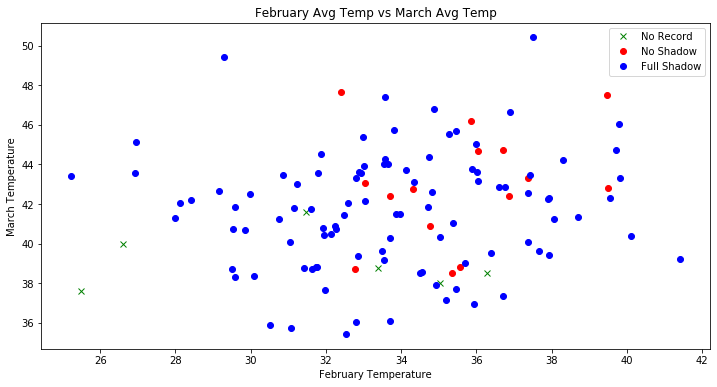

In [17]:
plt.plot(c0['February Average Temperature'], c0['March Average Temperature'], 'x', c='green', label='No Record')
plt.plot(c1['February Average Temperature'], c1['March Average Temperature'], 'o', c='red', label='No Shadow')
plt.plot(c3['February Average Temperature'], c3['March Average Temperature'], 'o', c='blue', label='Full Shadow')
plt.xlabel('February Temperature')
plt.ylabel('March Temperature')
plt.title('February Avg Temp vs March Avg Temp')
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

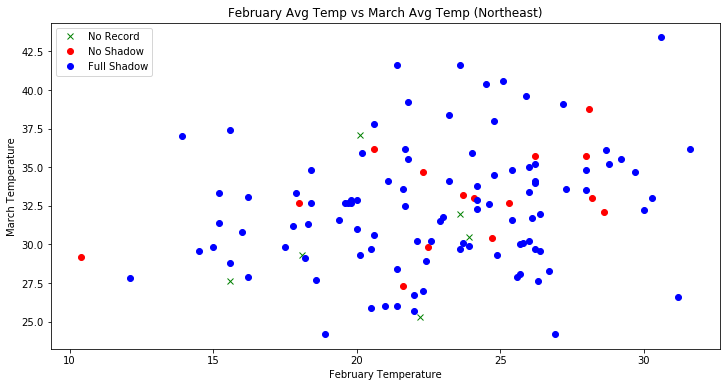

In [18]:
plt.plot(c0['February Average Temperature (Northeast)'], c0['March Average Temperature (Northeast)'], 'x', c='green', label='No Record')
plt.plot(c1['February Average Temperature (Northeast)'], c1['March Average Temperature (Northeast)'], 'o', c='red', label='No Shadow')
plt.plot(c3['February Average Temperature (Northeast)'], c3['March Average Temperature (Northeast)'], 'o', c='blue', label='Full Shadow')
plt.xlabel('February Temperature')
plt.ylabel('March Temperature')
plt.title('February Avg Temp vs March Avg Temp (Northeast)')
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

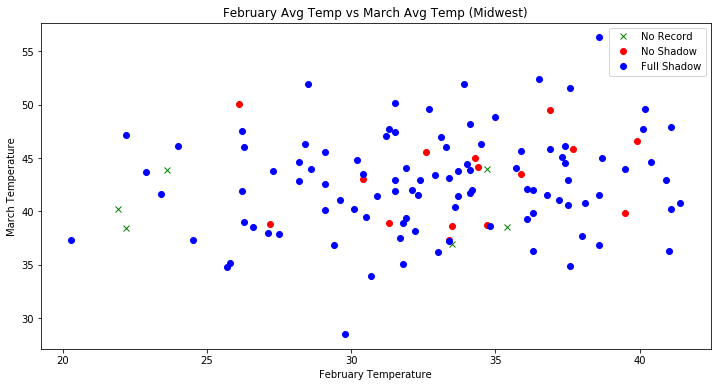

In [19]:
plt.plot(c0['February Average Temperature (Midwest)'], c0['March Average Temperature (Midwest)'], 'x', c='green', label='No Record')
plt.plot(c1['February Average Temperature (Midwest)'], c1['March Average Temperature (Midwest)'], 'o', c='red', label='No Shadow')
plt.plot(c3['February Average Temperature (Midwest)'], c3['March Average Temperature (Midwest)'], 'o', c='blue', label='Full Shadow')
plt.xlabel('February Temperature')
plt.ylabel('March Temperature')
plt.title('February Avg Temp vs March Avg Temp (Midwest)')
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

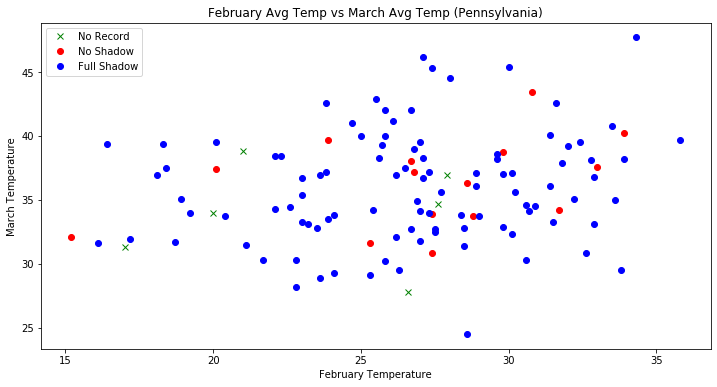

In [20]:
plt.plot(c0['February Average Temperature (Pennsylvania)'], c0['March Average Temperature (Pennsylvania)'], 'x', c='green', label='No Record')
plt.plot(c1['February Average Temperature (Pennsylvania)'], c1['March Average Temperature (Pennsylvania)'], 'o', c='red', label='No Shadow')
plt.plot(c3['February Average Temperature (Pennsylvania)'], c3['March Average Temperature (Pennsylvania)'], 'o', c='blue', label='Full Shadow')
plt.xlabel('February Temperature')
plt.ylabel('March Temperature')
plt.title('February Avg Temp vs March Avg Temp (Pennsylvania)')
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

By putting the data into groups based on the shadow and aggregating on the median/mean, we can draw conclusions about the relationship between various average temps and the shadow displayed that year. Looking at the aggregation, I realized that there is only one entry whose 'Shadow' is 2. Therefore, I decided to eliminate 'Partial Shadow' from the list of possible replacements, deeming it invalid due to lack of information (which could lead to underfitting). I could not find any discernable patterns in the aggregation, so I created visualizations to see if there are any distinct differences between entries with No Shadow vs Full Shadow. I also could not determine any differences based on different visualizations. Therefore, I decided to replace all of the 'No Record' values with the most common value seen in the data set: 'Full Shadow.'

In [21]:
df.replace(0, 3, inplace = True)
df.replace('No Record', 'Full Shadow', inplace = True)
df

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania),Shadow
9,1895,Full Shadow,26.60,15.6,21.9,17.0,39.97,27.6,40.2,31.3,3
10,1896,Full Shadow,35.04,22.2,33.5,26.6,38.03,25.3,36.9,27.8,3
11,1897,Full Shadow,33.39,23.6,34.7,27.9,38.79,32.0,44.0,36.9,3
12,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0,3
13,1899,Full Shadow,25.50,18.1,22.2,20.0,37.63,29.3,38.4,34.0,3
...,...,...,...,...,...,...,...,...,...,...,...
126,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7,3
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9,1
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3,3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6,3


#### Question 7 - If we are trying to write a machine learning program which predicts the type of shadow for the year, which column(s) should be the independent variables X? Why? 

#### Use pandas to assign a variable X to be all of the rows of the data set with the column(s) that represent the independent variables.

All columns except for 'Year', 'Punxsutawney Phil', and 'Shadow' should be considered independent variables. Since I could not find any disctinct patterns in Question 6, it is possible that any/all of the numerical temperature columns contribute to the type of the shadow for the year. Based on Groundhog Day beliefs, it is said that the shadow type determines whether or not Spring is coming. Therefore, if these beliefs are valid, then the shadow type should be able to be determined by temperature/changes in temperature.

In [22]:
X_cols = ['February Average Temperature', 'February Average Temperature (Northeast)', 'February Average Temperature (Midwest)', 'February Average Temperature (Pennsylvania)', 'March Average Temperature', 'March Average Temperature (Northeast)', 'March Average Temperature (Midwest)', 'March Average Temperature (Pennsylvania)']
X = df[X_cols]

#### Question 8 - If we are trying to write a machine learning program which predicts the type of shadow for the year, which column(s) should be the dependent variables Y? Why?  

#### Use pandas to assign a variable Y to be all of the rows of the data set with the column(s) that represent the dependent variables.

The column 'Shadow' should be the dependent variable because it is the characteristic that the program is trying to predict based on other variables (aka the independent vars). It is directly based on the values stored in the 'Punxsutawney Phil' column. While both columns can be considered dependent variables, it is better to choose one since they store the same information, only in different representations. It's easier to choose the 'Shadow' column because its values/categories are numerical as opposed to textual, making it easier to manipulate and process.

In [23]:
Y = df['Shadow']

#### Question 9 - Using the train_test_split function from the sklearn module, use a 70/30 split validation to split the data set into train and test. If you follow the example at the following link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Note: It's common practice to use the following variable names for unpacking the result:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(YOUR VALUE))

sklearn will create a proper split where the following statements hold true:
X_train is your train set independent variables
Y_train is your train set dependent variables
X_test is your test set independent variables
Y_test is your test set dependent variables

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#### Question 10 - Should the number of rows in X_train == number of rows in Y_train? Also, should the number of rows in X_test == Y_test? Why or why not? Validate your answer with code below:

Yes, the number of rows in X_train and X_test should match that of the Y_train and Y_test respectively because each input should produce one output. Although there are multiple independent variables, they come together to form a single input from which the single matching output is determined. This is true for both train sets and test sets.

In [26]:
print('X_train has the same number of rows as Y_train: ' + str(len(X_train) == len(Y_train)))
print('X_test has the same number of rows as Y_test: ' + str(len(X_test) == len(Y_test)))

X_train has the same number of rows as Y_train: True
X_test has the same number of rows as Y_test: True
